In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D,DepthwiseConv2D,Conv3D
#from keras.layers.SeparableConv2D import SeparableConv2D
#from keras.layers.DepthwiseConv2D import depth2d
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


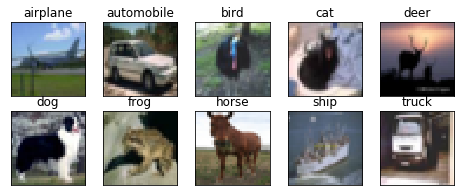

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 16s 41ms/step - loss: 1.9282 - acc: 0.2539 - val_loss: 1.5322 - val_acc: 0.4122
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.4296 - acc: 0.4704 - val_loss: 1.2073 - val_acc: 0.5574
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1900 - acc: 0.5758 - val_loss: 1.0404 - val_acc: 0.6242
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 1.0286 - acc: 0.6413 - val_loss: 0.9131 - val_acc: 0.6839
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9189 - acc: 0.6815 - val_loss: 0.7873 - val_acc: 0.7276
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8391 - acc: 0.7141 - val_loss: 0.7857 - val_acc: 0.7306
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7888 - acc: 0.7302 - val_loss: 0.7897 - val_acc: 0.7347
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

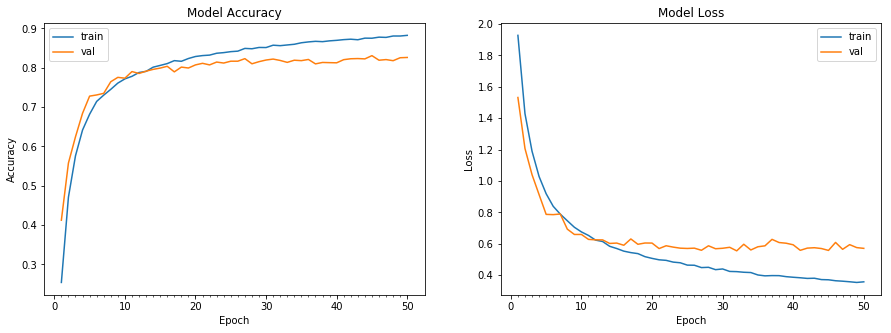

Accuracy on test data is: 82.59


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

<h3>Modified Above Network</h3>

In [0]:
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(DepthwiseConv2D(3,3))
model.add(SeparableConv2D(48,1,1))
model.add(Activation('relu'))
model.add(Convolution2D(48, 1, 1, activation='relu'))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 #Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
          
          
          

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
depthwise_conv2d_5 (Depthwis (None, 10, 10, 48)        480       
_________________________________________________________________
separable_conv2d_6 (Separabl (None, 10, 10, 48)        2400      
_________________________________________________________________
activation_26 (Activation)   (None, 10, 10, 48)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 48)        2352      
_________________________________________________________________
flatten_2 (Flatten)          (None, 4800)              0         
__________

This Block of code is compiled only with Depthwise Seperable Convolution.below is the code



In [0]:
#model = Sequential()
#model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
#model.add(Activation('relu'))
#model.add(DepthwiseConv2D(3,3))
#model.add(SeparableConv2D(48,1,1))
#model.add(Activation('relu'))
#model.add(Convolution2D(48, 1, 1, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(num_classes, activation='softmax'))
#Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 7s 18ms/step - loss: 1.8337 - acc: 0.3466 - val_loss: 1.5430 - val_acc: 0.4493
Epoch 2/50
390/390 [==============================] - 4s 9ms/step - loss: 1.4386 - acc: 0.4898 - val_loss: 1.3393 - val_acc: 0.5236
Epoch 3/50
390/390 [==============================] - 4s 9ms/step - loss: 1.2926 - acc: 0.5426 - val_loss: 1.2741 - val_acc: 0.5480
Epoch 4/50
390/390 [==============================] - 4s 10ms/step - loss: 1.2167 - acc: 0.5730 - val_loss: 1.2283 - val_acc: 0.5659
Epoch 5/50
390/390 [==============================] - 4s 9ms/step - loss: 1.1597 - acc: 0.5953 - val_loss: 1.1758 - val_acc: 0.5803
Epoch 6/50
390/390 [==============================] - 4s 9ms/step - loss: 1.1062 - acc: 0.6164 - val_loss: 1.1696 - val_acc: 0.5814
Epoch 7/50
390/390 [==============================] - 4s 10ms/step - loss: 1.0650 - acc: 0.6305 - val_loss: 1.1321 - val_acc: 0.5978
Epoch 8/50
390/390 [==============================] - 4s 9ms/step - loss:

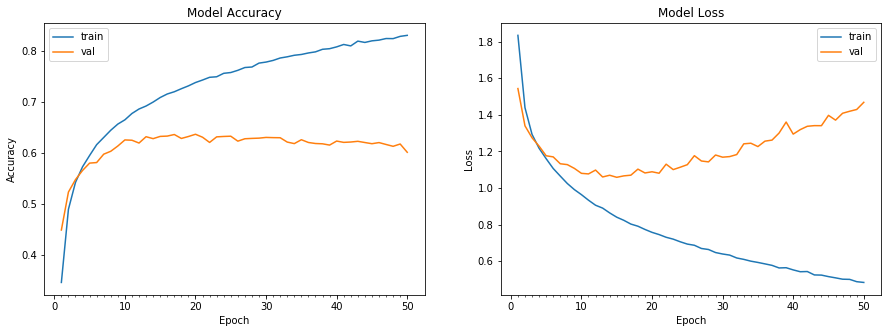

Accuracy on test data is: 60.15


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

<h3>This Block is compiled using all of things taken into consideration as per assignment.</h3>
<br>Normal Convolution
<br>Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
<br>Depthwise Separable Convolution
<br>Grouped Convolution (use 3x3, 5x5 only)
<br>Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

In [0]:
model = Sequential()
model.add(Convolution2D(92, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(92, 3, 1, activation='relu'))#spacial seperable conv.
model.add(Convolution2D(92, 1, 3, activation='relu'))#spacial seperable conv.
#model.add(Conv3D(92,3))
model.add(DepthwiseConv2D(3,3))
model.add(SeparableConv2D(92,1,1))
model.add(Activation('relu'))
#model.add(Conv3D(92,1))   #spatial convolution

model.add(Convolution2D(92, 1, 1, activation='relu'))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
          
          
          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(92, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(92, (3, 1), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(92, (1, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(92, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(92, (1, 1), activation="relu")`
  if sys.path[0] == '':


Working Model  - Included Group convolution.

In [0]:
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# input layer
visible = Input(shape=(32,32,3))


# first feature extractor
conv1 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(visible) #3

conv1 = Conv2D(64, 3,1, dilation_rate=3, border_mode='same' ,activation='relu' )(conv1) #4
conv1 = Conv2D(64, 1,3, dilation_rate=3, border_mode='same' ,activation='relu' )(conv1)  #5
conv1 = Dropout(0.25)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #10

conv1 = DepthwiseConv2D(32, 3, dilation_rate=2, padding='same', activation='relu')(pool1) #12
conv1 = Dropout(0.25)(conv1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv1) #24

conv1 = Conv2D(16 ,5,padding='same' ,activation='relu')(pool2) #26
conv1 = Dropout(0.25)(conv1)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv1) #
conv1 = Conv2D(10 ,8,padding='same' ,activation='relu')(pool3)


#------------------------------------------------------------------------------>
# second feature extractor

conv2 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(visible)

conv2 = Conv2D(64, 3,1, dilation_rate=1, border_mode='same' ,activation='relu' )(conv2)
conv2 = Conv2D(64, 1,3, dilation_rate=1, border_mode='same' ,activation='relu' )(conv2)
conv2 = Dropout(0.25)(conv2)

pool4 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv2 = DepthwiseConv2D(32, 3, dilation_rate=2, padding='same', activation='relu')(pool4)
conv2 = Dropout(0.25)(conv2)
pool5 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv2 = Conv2D(10 ,3,padding='same' ,activation='relu')(pool5)
pool6 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv2 = Conv2D(10 ,1,padding='same' ,activation='relu')(pool6)

# merge feature extractors
merge = concatenate([conv1, conv2])

# interpretation layer
output = Conv2D(10 ,1 ,activation='relu')(merge)
output = Flatten()(output)

#model defination
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_input_layer.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), dilation_rate=3, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 3), dilation_rate=3, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), dilation_rate=1, activation="relu", padding="same")`
/usr/loc

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 64)   6208        conv2d_14[0][0]                  
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_16 

Need to Find an issue with below network.

In [0]:
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# input layer
visible = Input(shape=(32,32,3))


# first feature extractor
conv1 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(visible) #3

conv1 = Conv2D(64, 3,1, dilation_rate=1, border_mode='same' ,activation='relu' )(conv1) #4  _#spatial conv
conv1 = Conv2D(64, 1,3, dilation_rate=1, border_mode='same' ,activation='relu' )(conv1)  #5
conv1 = Dropout(0.25)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #10


conv2 = DepthwiseConv2D(32, 3, dilation_rate=1, padding='same', activation='relu')(pool1) #12
conv2 = SeparableConv2D(48,1,1)
conv2 = Dropout(0.25)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #24

conv3 = Conv2D(16 ,5,padding='same' ,activation='relu')(pool2) #26
conv3 = Dropout(0.25)(conv1)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv1) #
conv3 = Conv2D(10 ,8,padding='same' ,activation='relu')(pool3)


#------------------------------------------------------------------------------>
# second feature extractor

conv4 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(visible)

conv4 = Conv2D(64, 3,1, dilation_rate=2, border_mode='same' ,activation='relu' )(conv2)
conv4 = Conv2D(64, 1,3, dilation_rate=2, border_mode='same' ,activation='relu' )(conv2)
conv4 = Dropout(0.25)(conv2)

pool4 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv5 = DepthwiseConv2D(32, 3, dilation_rate=2, padding='same', activation='relu')(pool4)
conv5 = SeparableConv2D(48,1,1)
conv5 = Dropout(0.25)(conv5)
pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

conv6 = Conv2D(10 ,3,padding='same' ,activation='relu')(pool5)
pool6 = MaxPooling2D(pool_size=(2, 2))(conv6)
conv6 = Conv2D(10 ,1,padding='same' ,activation='relu')(pool6)

# merge feature extractors
merge = concatenate([conv3, conv6])

# interpretation layer
output = Conv2D(10 ,1 ,activation='relu')(merge)
output = Flatten()(output)

#model defination
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_input_layer.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), dilation_rate=1, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 3), dilation_rate=1, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (1, 1))`


ValueError: ignored

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 64)   6208        conv2d_14[0][0]                  
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_16 

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 50s 129ms/step - loss: 6.5638 - acc: 0.1303 - val_loss: 6.2831 - val_acc: 0.1000
Epoch 2/50
390/390 [==============================] - 47s 119ms/step - loss: 5.0379 - acc: 0.1277 - val_loss: 4.8121 - val_acc: 0.1970
Epoch 3/50
390/390 [==============================] - 47s 121ms/step - loss: 4.7723 - acc: 0.1871 - val_loss: 4.7890 - val_acc: 0.2111
Epoch 4/50
390/390 [==============================] - 47s 120ms/step - loss: 4.8669 - acc: 0.1428 - val_loss: 4.8630 - val_acc: 0.1884
Epoch 5/50
390/390 [==============================] - 47s 120ms/step - loss: 4.7522 - acc: 0.1988 - val_loss: 4.8116 - val_acc: 0.1549
Epoch 6/50
390/390 [==============================] - 47s 120ms/step - loss: 4.8251 - acc: 0.1612 - val_loss: 4.8965 - val_acc: 0.1710
Epoch 7/50
390/390 [==============================] - 47s 120ms/step - loss: 4.7420 - acc: 0.2201 - val_loss: 4.6953 - val_acc: 0.2389
Epoch 8/50
390/390 [==============================] - 4

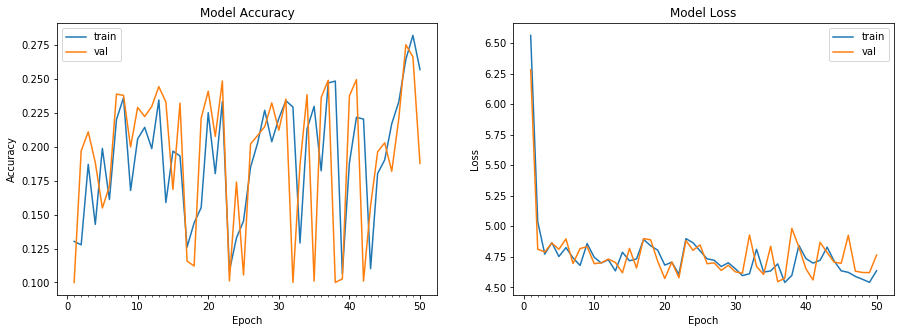

Accuracy on test data is: 18.77


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Modified network only with spacial seperable conv(Additional Experiment).

In [0]:
model = Sequential()
model.add(Convolution2D(92, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(92, 3, 1, activation='relu'))#spacial seperable conv.
model.add(Convolution2D(92, 1, 3, activation='relu'))#spacial seperable conv.
#model.add(Conv3D(92,3))
#model.add(DepthwiseConv2D(3,3))
#model.add(SeparableConv2D(92,1,1))
model.add(Activation('relu'))
#model.add(Conv3D(92,1))   #spatial convolution

model.add(Convolution2D(92, 1, 1, activation='relu'))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 #Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(92, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(92, (3, 1), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(92, (1, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(92, (1, 1), activation="relu")`
  if sys.path[0] == '':


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 92)        2576      
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 92)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 30, 32, 92)        25484     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 92)        25484     
_________________________________________________________________
activation_34 (Activation)   (None, 30, 30, 92)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 30, 30, 92)        8556      
_________________________________________________________________
flatten_9 (Flatten)          (None, 82800)             0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 14s 35ms/step - loss: 1.4426 - acc: 0.4845 - val_loss: 1.1527 - val_acc: 0.5861
Epoch 2/50
390/390 [==============================] - 13s 33ms/step - loss: 1.0467 - acc: 0.6341 - val_loss: 1.0234 - val_acc: 0.6451
Epoch 3/50
390/390 [==============================] - 13s 34ms/step - loss: 0.8485 - acc: 0.7034 - val_loss: 0.9946 - val_acc: 0.6552
Epoch 4/50
390/390 [==============================] - 13s 34ms/step - loss: 0.6918 - acc: 0.7620 - val_loss: 0.9778 - val_acc: 0.6608
Epoch 5/50
390/390 [==============================] - 13s 34ms/step - loss: 0.5157 - acc: 0.8234 - val_loss: 1.0472 - val_acc: 0.6697
Epoch 6/50
390/390 [==============================] - 13s 34ms/step - loss: 0.3339 - acc: 0.8875 - val_loss: 1.1982 - val_acc: 0.6619
Epoch 7/50
390/390 [==============================] - 14s 35ms/step - loss: 0.1927 - acc: 0.9353 - val_loss: 1.5206 - val_acc: 0.6390
Epoch 8/50
390/390 [==============================] - 14s 35ms

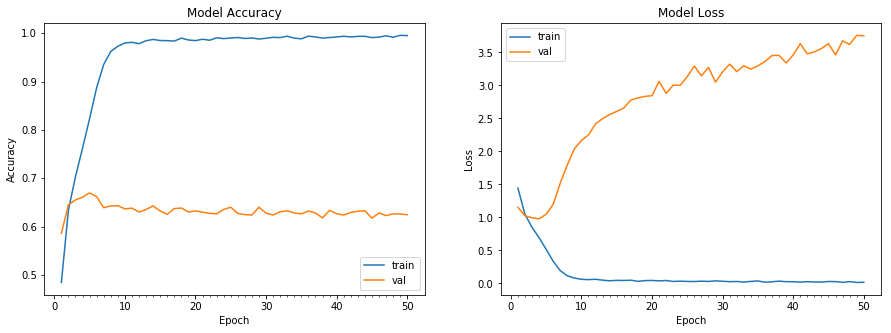

Accuracy on test data is: 62.45


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))